<a href="https://colab.research.google.com/github/sherlockian4869/python/blob/main/Analysis/Web_Scraping_and_Morphological_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab環境でwebスクレイピングをしてみる  
参考にした資料  
・[Google Colab環境でWebスクレイピングを行うためのメモ。スクレイピングした情報をGoogle Driveに書き込むまでの流れ](https://qiita.com/safa/items/90c370ebefbecbcfecac)  

・[pythonでスクレイピングを行う方法](https://techacademy.jp/magazine/18875)  

・[pythonのlxmlライブラリの使い方](https://techacademy.jp/magazine/19063)  

・[pythonを用いたcsvファイルの書き込み及び読み込み](https://okazukun5.com/122/)

・[[python]MeCabでだれでも簡単にできる分かち書きをする方法](https://sleepless-se.net/2018/08/24/python-mecab-wakatigaki/)

・[Beautiful Soup のfind_all( ) と select( ) の使い方](https://gammasoft.jp/blog/difference-find-and-select-in-beautiful-soup-of-python/)

・[Pythonで文章中の頻出単語を抽出する方法](https://analysis-navi.com/?p=2167)

このColabでやった実際の手順  
・Goolge Newsから記事を引っ張ってくる  
・スクレイピングしたものをcsvファイルにしてドライブに格納  
　※csvファイルにしてドライブ格納ができなかったため、  そのまま文字列を使って形態素解析  
・csvファイルからデータを読み取って、形態素解析  
・単語のカウントを行い、最も多く頻出された単語を表示  
・単語の整理を行い品詞ごとに多く頻出された単語を表示  

In [88]:
# # pythonのバージョン確認
# !python --version

# # requestとbeautifulsoup4がインストールされているか確認
# !pip freeze | grep request
# !pip freeze | grep beautiful

In [89]:
# MeCabライブラリのインストール
!pip install mecab-python3

In [90]:
!pip install unidic

In [91]:
!python -m unidic download

download url: https://cotonoha-dic.s3-ap-northeast-1.amazonaws.com/unidic-3.1.0.zip
Dictionary version: 3.1.0+2021-08-31
unidic-3.1.0.zip: 100% 526M/526M [00:56<00:00, 9.28MB/s]
Finished download.
Downloaded UniDic v3.1.0+2021-08-31 to /usr/local/lib/python3.7/dist-packages/unidic/dicdir


In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
import requests
request = requests.get('https://api.github.com/repos/psf/requests')
request.json()["description"]

'A simple, yet elegant, HTTP library.'

In [94]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')

print(soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [95]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd

# WebサイトのURLを指定
url = "https://news.google.com/?hl=ja&gl=JP&ceid=JP:ja"

# Requestsを利用してWebページを取得する
r = requests.get(url)

# BeautifulSoupを利用してWebページを解析する
soup = BeautifulSoup(r.text, 'html.parser')

# soup.find_allを利用して、ヘッドラインのタイトルを取得する
elems = soup.find_all("a", class_="DY5T1d")

# drive上にcsvファイルとして書き出し
# 実装できなかったので後回し
# columns = ['news']
# df = pd.DataFrame(columns=columns)

# for item in elems:
#   news = item.getText()
#   se = pd.Series([news], columns)
#   df = df.append(se, columns)

# with open('/test_02.csv', mode='w') as f:
#   df.to_csv(f, index=False)

In [109]:
import MeCab
import unidic

# ニュースの文字列の作成
news = ''
for e in elems:
  news += e.getText() + '\n'

print(news)

# mecab = MeCab.Tagger('')
# node = mecab.parseToNode(news)
# words = []

# while node:
#   words.append(node.surface)
#   node = node.next

温泉入浴で腸内細菌に変化 九州大、別府での研究を中間報告（毎日新聞） - Yahoo!ニュース
「こども庁」→「こども家庭庁」へ なぜ名称変更？
こども庁→「こども家庭庁」に反対の声。「家庭が安心できる居場所だったことは…」自民党内でも意見割れる（BuzzFeed Japan） - Yahoo!ニュース
「こども庁」を「こども家庭庁」に変更 自民保守派に配慮
新組織は「こども家庭庁」 いじめ対策も文科省と共同所掌
「こども庁」→「こども家庭庁」へ なぜ名称変更？(2021年12月15日)
英の新規感染者、過去最多7万8000人に オミクロン急増（写真=ロイター）
英新規感染が過去最高更新 7万8千人、新変異株急増（共同通信） - Yahoo!ニュース
英・オミクロン株拡大「ロンドンで全感染者の40％」(2021年12月15日)
英 オミクロン「驚異的な広がり」死亡例も、韓国 防疫パス 連日障害
イギリスでコロナ感染者過去最多 “ロンドンはオミクロン株60%”
政府 “10万円給付指針”現金一括給付など 全国の自治体に通知
【１０万円給付】"現金一括"へ 自治体で進む準備
新型コロナ 10万円給付 全市町、現金一括に 政府方針転換、対応追われ ／香川
「10万円給付」新指針 “クーポン派”市長も転換(2021年12月15日)
申請するだけでもらえるお金 岸田政権の「経済政策」を知る！〈週刊朝日〉（AERA dot.） - Yahoo!ニュース
赤木さん妻「不意打ち、ひきょうだ」 政府、森友改ざん真相究明させず
赤木雅子さん「ふざけんなと思う」公文書改ざん訴訟 国側が請求を『認め』に転じる 国との裁判が終結へ（MBSニュース） - Yahoo!ニュース
対応一転・・・赤木さん自死「国の責任明らか」鈴木大臣(2021年12月15日)
首相「痛恨の極み」 元財務職員自殺
赤木さん妻「ふざけるな！」国の幕引きに怒り 森友文書改ざん問題
週間天気 各地で雨に、日本海側は大雪に警戒 週末は真冬の寒さ
週末は日本海側で1m近い大雪のおそれ 西日本でも雪の降る可能性（ウェザーニュース） - Yahoo!ニュース
最強寒気 今週末は大雪に警戒
週末は日本海側で1m近い大雪のおそれ 西日本でも雪の降る可能性
17日（金）～18日（土）冬型の気圧配置強まる 日本海側は猛ふぶきや大雪のおそれ

In [110]:
print(words)

[]


In [111]:
# 単語のカウント
import collections
count = collections.Counter(words)
# 最も使われている回数が多い単語
print(count.most_common(10))

[]


In [125]:
# 使用する品詞を絞る
mecab = MeCab.Tagger('')
node = mecab.parseToNode(news)
words = []
while node:
  hinshi = node.feature.split(",")[0]
  word = node.surface
  if hinshi in ['名詞', '動詞', '形容詞']:
    origin = word
    words.append(origin)
  node = node.next

In [126]:
print(words)

['温泉', '入浴', '腸内', '細菌', '変化', '九州', '別府', '研究', '中間', '報告', '毎日', '新聞', 'Yahoo', 'ニュース', 'こども', 'こども', '家庭', '名称', '変更', 'こども', 'こども', '家庭', '反対', '声', '家庭', '安心', 'できる', '居', '場所', 'こと', '自民', '意見', '割れる', 'BuzzFeed', 'Japan', 'Yahoo', 'ニュース', 'こども', 'こども', '家庭', '変更', '自民', '保守', '配慮', '組織', 'こども', '家庭', 'いじめ', '対策', '文科', '共同', '所掌', 'こども', 'こども', '家庭', '名称', '変更', '2021', '年', '12', '月', '15', '英', '感染', '過去', '最多', '7', '万', '8000', '急増', '写真', 'ロイター', '英', '感染', '過去', '最高', '更新', '7', '万', '8千', '変', '異株', '急増', '共同', '通信', 'Yahoo', 'ニュース', '英', '株', '拡大', 'ロンドン', '感染', '40', '％', '2021', '年', '12', '月', '15', '英', '驚異', '広がり', '死亡', '例', '韓国', '防疫', 'パス', '連日', '障害', 'イギリス', 'コロナ', '感染', '過去', '最多', 'ロンドン', '株', '60', '政府', '10', '万', '円', '給付', '指針', '現金', '一括', '給付', '全国', '自治', '体', '通知', '１０', '万', '円', '給付', '現金', '一括', '自治', '体', '進む', '準備', '新型', 'コロナ', '10', '万', '円', '給付', '市', '町', '現金', '一括', '政府', '方針', '転換', '対応', '追わ', '香川', '10', '万', '円', '給付', '指針', 'クーポン', '市長

[('ニュース', 9), ('こども', 9), ('Yahoo', 7), ('日本', 7), ('家庭', 6), ('2021', 6), ('万', 6), ('年', 5), ('給付', 5), ('側', 5), ('大雪', 5), ('12', 4), ('月', 4), ('15', 4), ('英', 4), ('感染', 4), ('円', 4), ('赤木', 4), ('1', 4), ('変更', 3)]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12517 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12371 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12393 missing from current font.
  font.set_

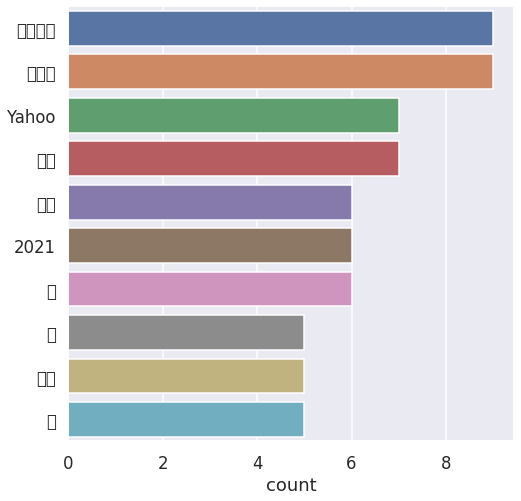

In [130]:
# グラフで可視化
import seaborn as sns
import matplotlib.pyplot as plt

count = collections.Counter(words)
print(count.most_common(20))
sns.set(context='talk')
fig = plt.subplots(figsize=(8, 8))

sns.countplot(y=words, order=[i[0] for i in count.most_common(10)])